# Data Analysis Step

## Retrieve Dataset
## Data cleansing
## Data Processing
## Data Analysis Univariate
## Data Analysis Multivariate
## Hypothesis Test
###### Feature Engineering
###### Model
###### Measure and Performance
## Conclusion and Recommandations

### Project Goals

*A bank is interested in providing higher quality customer service to protect customers financial assets*. 

### Context 

The bank has been receiving several complaints about credit card frauds from their customers and the news media is regularly reporting about how the bank's customers are losing large amounts of money and the bank is doing nothing to stop it. This is impacting both the customers experience and their market share. The Senior Management is asking for a deep dive into this issue.

We just got hired as the Business Analyst for the bank, and they provided you with 6 months of available data (step 0 to 179 refer to the dates). They want you to share some insights using the features in the file to determine if you can see a pattern for the fraudulent transactions. They are expecting you to provide some suggestions on how to tackle the problem.



### Questions Asked
1. Show a summary of the variable you are studying (target variable). Plot the most appropriate graph to represent this data.
2. Calculate summary statistics from the data.
3. Calculation of daily trends of transactions for different categories of variables.
4. What are your thoughts on the fraudulent transactions? Is there a threshold of the spent? Is there a specific ‘gender’ with a higher probability to be the victim of a fraudulent act? or ‘category’ of transactions with higher chance to be fraudulent?
5. What are your recommendations to the bank's management and describe how
your solution will help regain trust from customers?
6. Any other data that you would ask the team to provide? Why?


# Retrieve Dataset

In [ ]:
# Import the librairies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re as re
import seaborn as sns
import datetime as dt
from scipy.stats import chi2_contingency

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the data using csv
Bank=pd.read_csv(r"/content/drive/MyDrive/BI Project -Week 3/bs140513_032310.csv")

# Data cleaning

## **Exploring data**

In [ ]:
# See initial 5 records
Bank.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [ ]:
# See last 5 records
Bank.tail()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0
594642,179,'C616528518','4','F','28007','M1823072687','28007','es_transportation',26.93,0


In [ ]:
# Print list of columns in the data
print(Bank.columns)


Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')


In [ ]:
# Print the shape of a DataFrame
print(Bank.shape)

(594643, 10)


In [ ]:
# Check the information of DataFrame
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [ ]:
# Check the descriptive statistics
Bank.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [ ]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [ ]:
Bank.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [ ]:
#Bank category summary
A=Bank['category'].value_counts()
print(A)
A.describe()

'es_transportation'        505119
'es_food'                   26254
'es_health'                 16133
'es_wellnessandbeauty'      15086
'es_fashion'                 6454
'es_barsandrestaurants'      6373
'es_hyper'                   6098
'es_sportsandtoys'           4002
'es_tech'                    2370
'es_home'                    1986
'es_hotelservices'           1744
'es_otherservices'            912
'es_contents'                 885
'es_travel'                   728
'es_leisure'                  499
Name: category, dtype: int64


count        15.000000
mean      39642.866667
std      128979.359378
min         499.000000
25%        1328.000000
50%        4002.000000
75%       10770.000000
max      505119.000000
Name: category, dtype: float64

In [ ]:
#Bank Age Summary
B=Bank['age'].value_counts()
print(B)
B.describe()

'2'    187310
'3'    147131
'4'    109025
'5'     62642
'1'     58131
'6'     26774
'0'      2452
'U'      1178
Name: age, dtype: int64


count         8.00000
mean      74330.37500
std       68082.36723
min        1178.00000
25%       20693.50000
50%       60386.50000
75%      118551.50000
max      187310.00000
Name: age, dtype: float64

In [ ]:
#Summary of Amount
C=Bank["amount"].value_counts()
print(C)
C.describe()

14.93     146
26.67     146
17.57     145
17.26     143
16.12     143
         ... 
751.43      1
274.43      1
517.95      1
105.02      1
429.60      1
Name: amount, Length: 23767, dtype: int64


count    23767.000000
mean        25.019691
std         40.154029
min          1.000000
25%          1.000000
50%          2.000000
75%         30.000000
max        146.000000
Name: amount, dtype: float64

In [ ]:
#Descride the target variable
Bank['fraud'].describe()

count    594643.000000
mean          0.012108
std           0.109369
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: fraud, dtype: float64

In [ ]:
Bank.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [ ]:
Bank.amount.describe()

count    594643.000000
mean         37.890135
std         111.402831
min           0.000000
25%          13.740000
50%          26.900000
75%          42.540000
max        8329.960000
Name: amount, dtype: float64

In [ ]:
#Bank summary
Bank.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [ ]:

#rename columns
Bank.rename(columns={"step":"date"}, inplace=True)
Bank

,date,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


In [ ]:
#Function to remove unwanted characters from column value
def remove_char(dataset,cols=[],new={}):
  dataset[cols] = dataset[cols].replace(new, regex=True)
  return dataset.head()

In [ ]:
###Application of the function to some columns
remove_char(Bank,cols=['customer','age','zipcodeOri','gender','merchant','category','zipMerchant'],new={"'":''})

,date,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0
1,0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0
2,0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0
3,0,C1760612790,3,M,28007,M348934600,28007,es_transportation,17.25,0
4,0,C757503768,5,M,28007,M348934600,28007,es_transportation,35.72,0


In [ ]:
Bank["date"]

0           0
1           0
2           0
3           0
4           0
         ... 
594638    179
594639    179
594640    179
594641    179
594642    179
Name: date, Length: 594643, dtype: int64

In [ ]:
#Set date in index
indexed_bank=Bank.set_index('date')
indexed_bank

,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
date,,,,,,,,,
0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0
0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0
0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0
0,C1760612790,3,M,28007,M348934600,28007,es_transportation,17.25,0
0,C757503768,5,M,28007,M348934600,28007,es_transportation,35.72,0
...,...,...,...,...,...,...,...,...,...
179,C1753498738,3,F,28007,M1823072687,28007,es_transportation,20.53,0
179,C650108285,4,F,28007,M1823072687,28007,es_transportation,50.73,0
179,C123623130,2,F,28007,M349281107,28007,es_fashion,22.44,0


# Functions list definitions

In [ ]:


# Define a function who generate barchart
def generate_barchart(data=Bank, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,10)):
  
  """ function who generate barchart"""
  
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
              tot+ 3,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()

In [ ]:

# Calculate absolute frequency and relative Frequency for a categpric variable

def prob_category(data,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title=""):
  res1 = data[col].value_counts().to_frame()
  res1.columns = [abs_value]

  res2 = data[col].value_counts(normalize=True).to_frame()
  res2.columns = [rel_value]
  if  not show_plot:
    return pd.concat([res1,res2],axis=1)
  else:
    result = pd.concat([res1,res2],axis=1)
    generate_barchart(data=result.head(), title =title,abs_value =abs_value,rel_value=rel_value,figsize =(10,10))
    return result

In [ ]:

def cateorigal_label(dataset=None,col_name=None,dict0=None, use_dict =False):
  """ 
  This function allow us to create a categorical values
  """
  if not use_dict:
   return dataset[col_name].apply(lambda x: f"{col_name} {x}" )
  else:
    return dataset[col_name].replace(dict0)

In [ ]:
#Cateorigal Columns
cat_cols = ["fraud","gender","category","age",]
#quant_cols = ["age","amount"]

cat_dataset = Bank[cat_cols]
cat_dataset.head()

,fraud,gender,category,age
0,0,M,es_transportation,4
1,0,M,es_transportation,2
2,0,F,es_transportation,4
3,0,M,es_transportation,3
4,0,M,es_transportation,5


In [ ]:
#Transform in to cateorigal values
for col in  Bank[cat_cols]:
    cat_dataset[f"{col}"] = cateorigal_label(dataset=cat_dataset,col_name=col,dict0 ={0:"No",1:"Yes"},use_dict=True)
  #else:
  #  cat_dataset[f"{col}"] = cateorigal_label(dataset=cat_dataset,col_name=col)
    print(cat_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

       fraud gender           category age
0         No      M  es_transportation   4
1         No      M  es_transportation   2
2         No      F  es_transportation   4
3         No      M  es_transportation   3
4         No      M  es_transportation   5
...      ...    ...                ...  ..
594638    No      F  es_transportation   3
594639    No      F  es_transportation   4
594640    No      F         es_fashion   2
594641    No      M  es_transportation   5
594642    No      F  es_transportation   4

[594643 rows x 4 columns]
       fraud gender           category age
0         No      M  es_transportation   4
1         No      M  es_transportation   2
2         No      F  es_transportation   4
3         No      M  es_transportation   3
4         No      M  es_transportation   5
...      ...    ...                ...  ..
594638    No      F  es_transportation   3
594639    No      F  es_transportation   4
594640    No      F         es_fashion   2
594641    No      M  es_tra

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Data Analysis Univariate

In [ ]:

# univariate Analysis
# Calculate absolute frequency and relative frequency for each cateorigal variabl

def prob_category1(data,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title=""):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1)
   else:
     result = pd.concat([res1,res2],axis=1)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =(10,6))
     return result

def generate_barchart1(data=None, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6)):
  
  """ Function who generate  a barchat for  cateorigal variable"""

  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  color ="White"
  for tot, perc in zip(data[abs_value],data[rel_value]):
    if tot/2 <= 50:
      tot=100
      color ="gray"

    axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color=color,fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
              tot+ 5,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()

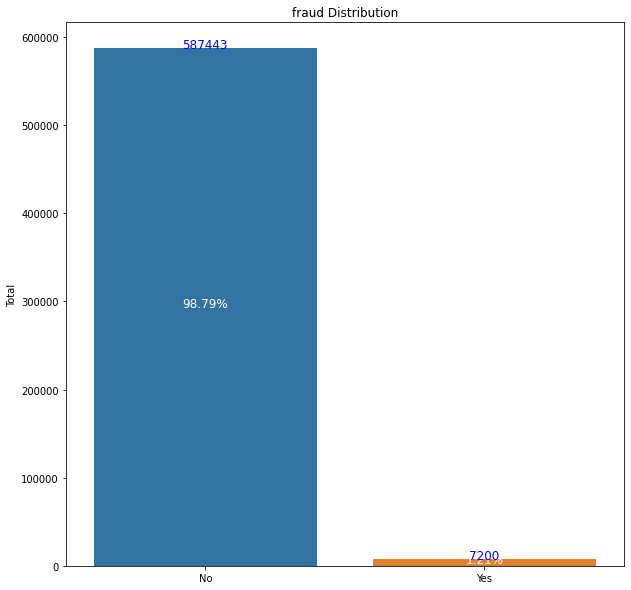

,Total,Percent
No,587443,0.987892
Yes,7200,0.012108


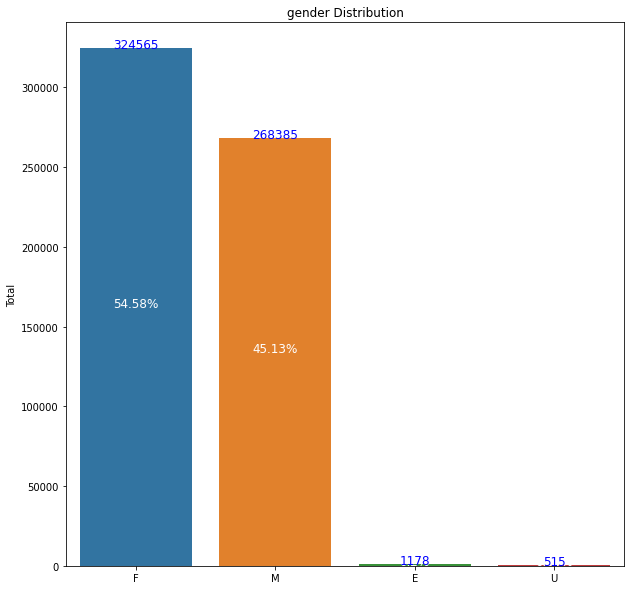

,Total,Percent
F,324565,0.545815
M,268385,0.451338
E,1178,0.001981
U,515,0.000866


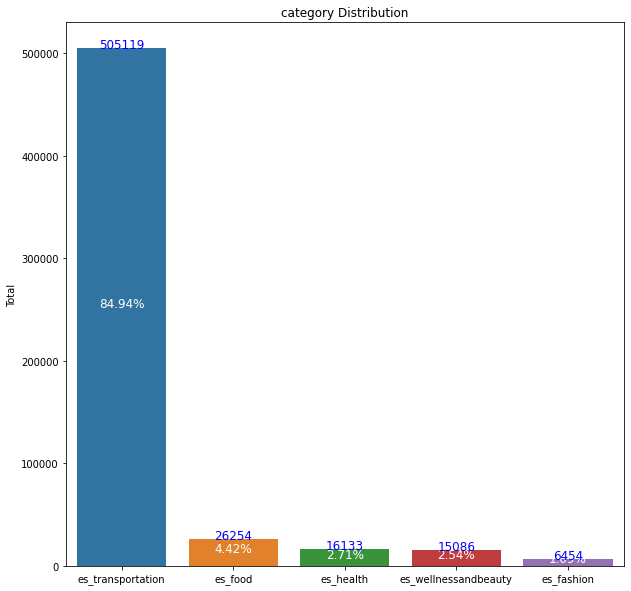

,Total,Percent
es_transportation,505119,0.849449
es_food,26254,0.044151
es_health,16133,0.027131
es_wellnessandbeauty,15086,0.025370
es_fashion,6454,0.010854
es_barsandrestaurants,6373,0.010717
es_hyper,6098,0.010255
es_sportsandtoys,4002,0.006730
es_tech,2370,0.003986
es_home,1986,0.003340


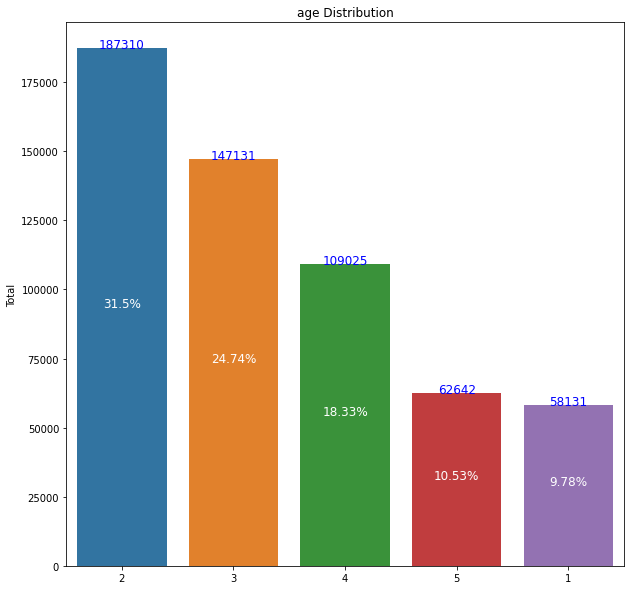

,Total,Percent
2,187310,0.314996
3,147131,0.247427
4,109025,0.183345
5,62642,0.105344
1,58131,0.097758
6,26774,0.045025
0,2452,0.004123
U,1178,0.001981


In [ ]:
#Show all univariate analysis succesively
for cat_col in cat_dataset:
  result = prob_category(data=cat_dataset,col=cat_col, abs_value ="Total",rel_value ="Percent",show_plot=True,title=f"{cat_col} Distribution")
  display(result)

In [ ]:
indexed_bank

,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
date,,,,,,,,,
0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0
0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0
0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0
0,C1760612790,3,M,28007,M348934600,28007,es_transportation,17.25,0
0,C757503768,5,M,28007,M348934600,28007,es_transportation,35.72,0
...,...,...,...,...,...,...,...,...,...
179,C1753498738,3,F,28007,M1823072687,28007,es_transportation,20.53,0
179,C650108285,4,F,28007,M1823072687,28007,es_transportation,50.73,0
179,C123623130,2,F,28007,M349281107,28007,es_fashion,22.44,0


# Multivariate Data Analysis 

##Daily Trend Transaction by Genre

In [ ]:
#create a data can give the daily trend transaction by genre
date=Bank['date']
amount=Bank['amount']
gender=Bank['gender']
customer=Bank['customer']
Daily_trend_Transaction_By_Genre= pd.concat([date,gender,amount,customer], axis=1)
#Daily_trend_Transaction_By_Genre=(Bank["amount"]+Bank['gender'])

Daily_trend_Transaction_By_Genre

,date,gender,amount,customer
0,0,M,4.55,C1093826151
1,0,M,39.68,C352968107
2,0,F,26.89,C2054744914
3,0,M,17.25,C1760612790
4,0,M,35.72,C757503768
...,...,...,...,...
594638,179,F,20.53,C1753498738
594639,179,F,50.73,C650108285
594640,179,F,22.44,C123623130
594641,179,M,14.46,C1499363341


In [ ]:
#Transform values in columns gender as Columns
Daily_trend_Transaction_By_Genre1= pd.get_dummies(Daily_trend_Transaction_By_Genre[["date","gender","amount","customer"]], columns=['gender'], prefix="", prefix_sep="")
Daily_trend_Transaction_By_Genre1

,date,amount,customer,E,F,M,U
0,0,4.55,C1093826151,0,0,1,0
1,0,39.68,C352968107,0,0,1,0
2,0,26.89,C2054744914,0,1,0,0
3,0,17.25,C1760612790,0,0,1,0
4,0,35.72,C757503768,0,0,1,0
...,...,...,...,...,...,...,...
594638,179,20.53,C1753498738,0,1,0,0
594639,179,50.73,C650108285,0,1,0,0
594640,179,22.44,C123623130,0,1,0,0
594641,179,14.46,C1499363341,0,0,1,0


In [ ]:


#Add a columns female where every values== 1 is replace by amount values
Daily_trend_Transaction_By_Genre1["Female"] = 0.0
Daily_trend_Transaction_By_Genre1.loc[Daily_trend_Transaction_By_Genre1["F"]==1 ,"Female"]=Daily_trend_Transaction_By_Genre1[Daily_trend_Transaction_By_Genre1["F"]==1].amount
Daily_trend_Transaction_By_Genre1["Female"]

#Add a columns male where every values== 1 is replace by amount values
Daily_trend_Transaction_By_Genre1["Male"] = 0.0
Daily_trend_Transaction_By_Genre1.loc[Daily_trend_Transaction_By_Genre1["M"]==1 ,"Male"]=Daily_trend_Transaction_By_Genre1[Daily_trend_Transaction_By_Genre1["M"]==1].amount
Daily_trend_Transaction_By_Genre1["Male"]

#Build a dataframe with values male and Female
Male=Daily_trend_Transaction_By_Genre1["Male"]
Female=Daily_trend_Transaction_By_Genre1["Female"]
Date=Daily_trend_Transaction_By_Genre1["date"]

#Concat Male and Female dataframe
Daily_trend_Transaction_By_Genre_2=pd.concat([Male,Female,Date], axis=1)
print(Daily_trend_Transaction_By_Genre_2)
#print(Male)

#df.groupby(['Animal']).mean()

#Groub by date
registration_data =Daily_trend_Transaction_By_Genre_2.groupby(["date"]).sum()
print(registration_data)


         Male  Female  date
0        4.55    0.00     0
1       39.68    0.00     0
2        0.00   26.89     0
3       17.25    0.00     0
4       35.72    0.00     0
...       ...     ...   ...
594638   0.00   20.53   179
594639   0.00   50.73   179
594640   0.00   22.44   179
594641  14.46    0.00   179
594642   0.00   26.93   179

[594643 rows x 3 columns]
          Male    Female
date                    
0     38285.72  54036.05
1     38405.66  63073.45
2     38528.31  63650.16
3     49277.81  58242.28
4     46613.76  57627.19
...        ...       ...
175   59297.81  72845.49
176   62228.81  68363.29
177   59258.31  73921.39
178   61041.69  79939.56
179   56306.68  79490.86

[180 rows x 2 columns]


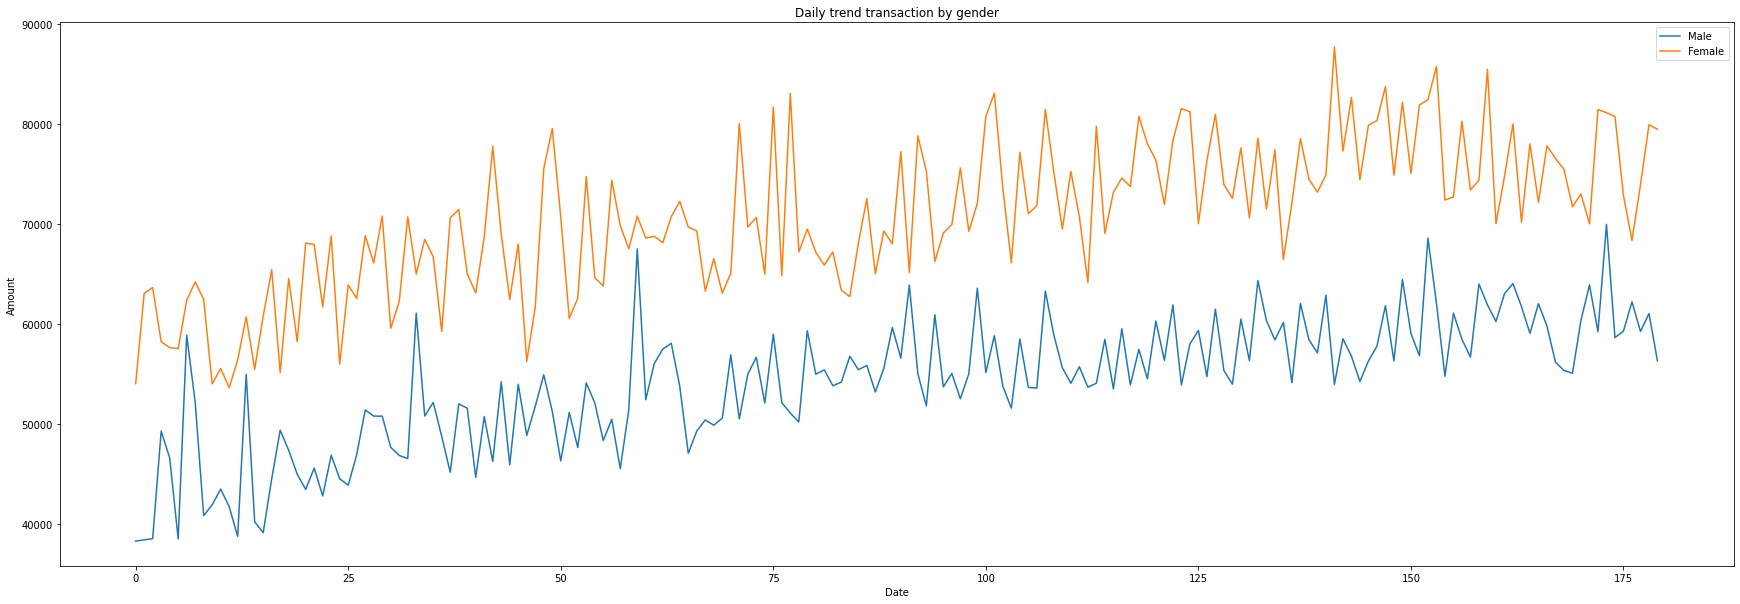

In [84]:
#Show daily trend transaction by gender 

plt.figure(figsize=(30, 10))
line_chart1 = plt.plot(registration_data)
#line_chart2 = plt.plot(Female,"m")
plt.title('Daily trend transaction by gender')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend(['Male','Female'])
plt.show()


As we can see the women spent more than the man. Her daily amount mean daily is higher than the daily amouont mean of the men.

##Daily Trend Transaction by Age

In [ ]:
#createsimple dataframe with each needed columns
#create a data can give the daily trend transaction by Age by concatenation
date=Bank['date']
amount=Bank['amount']
age=Bank['age']
customer=Bank['customer']
Daily_trend_Transaction_By_Age= pd.concat([date,age,amount,customer], axis=1)

Daily_trend_Transaction_By_Age

,date,age,amount,customer
0,0,4,4.55,C1093826151
1,0,2,39.68,C352968107
2,0,4,26.89,C2054744914
3,0,3,17.25,C1760612790
4,0,5,35.72,C757503768
...,...,...,...,...
594638,179,3,20.53,C1753498738
594639,179,4,50.73,C650108285
594640,179,2,22.44,C123623130
594641,179,5,14.46,C1499363341


In [ ]:
#Tranform values age in columns
Daily_trend_Transaction_By_Age1= pd.get_dummies(Daily_trend_Transaction_By_Age[["date","age","amount","customer"]], columns=['age'], prefix="", prefix_sep="")
Daily_trend_Transaction_By_Age1
#Daily_trend_Transaction_By_Age1.drop(["U"], axis='columns' , inplace=True)
#Daily_trend_Transaction_By_Genre1

,date,amount,customer,0,1,2,3,4,5,6,U
0,0,4.55,C1093826151,0,0,0,0,1,0,0,0
1,0,39.68,C352968107,0,0,1,0,0,0,0,0
2,0,26.89,C2054744914,0,0,0,0,1,0,0,0
3,0,17.25,C1760612790,0,0,0,1,0,0,0,0
4,0,35.72,C757503768,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
594638,179,20.53,C1753498738,0,0,0,1,0,0,0,0
594639,179,50.73,C650108285,0,0,0,0,1,0,0,0
594640,179,22.44,C123623130,0,0,1,0,0,0,0,0
594641,179,14.46,C1499363341,0,0,0,0,0,1,0,0


In [ ]:

#df["x"]=Daily_trend_transaction_By_Age1.columns

#Add a columns Age_0 where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Age1["Age_0"] = 0.0
Daily_trend_Transaction_By_Age1.loc[Daily_trend_Transaction_By_Age1["0"]==1 ,"Age_0"]=Daily_trend_Transaction_By_Age1[Daily_trend_Transaction_By_Age1["0"]==1].amount
Daily_trend_Transaction_By_Age1["Age_0"]

#Add a columns Age_1 where every values== 1 in df["1"] is replace by amount values
Daily_trend_Transaction_By_Age1["Age_1"] = 0.0
Daily_trend_Transaction_By_Age1.loc[Daily_trend_Transaction_By_Age1["1"]==1 ,"Age_1"]=Daily_trend_Transaction_By_Age1[Daily_trend_Transaction_By_Age1["1"]==1].amount
Daily_trend_Transaction_By_Age1["Age_1"]


#Add a columns Age_2 where every values== 1 in df["2"] is  replace by amount values
Daily_trend_Transaction_By_Age1["Age_2"] = 0.0
Daily_trend_Transaction_By_Age1.loc[Daily_trend_Transaction_By_Age1["2"]==1 ,"Age_2"]=Daily_trend_Transaction_By_Age1[Daily_trend_Transaction_By_Age1["2"]==1].amount
Daily_trend_Transaction_By_Age1["Age_2"]


#Add a columns Age_3 where every values== 1 in df["3"] is replace by amount values
Daily_trend_Transaction_By_Age1["Age_3"] = 0.0
Daily_trend_Transaction_By_Age1.loc[Daily_trend_Transaction_By_Age1["3"]==1 ,"Age_3"]=Daily_trend_Transaction_By_Age1[Daily_trend_Transaction_By_Age1["3"]==1].amount
Daily_trend_Transaction_By_Age1["Age_3"]


#Add a columns Age_4 where every values== 1 in df["4"] is replace by amount values
Daily_trend_Transaction_By_Age1["Age_4"] = 0.0
Daily_trend_Transaction_By_Age1.loc[Daily_trend_Transaction_By_Age1["4"]==1 ,"Age_4"]=Daily_trend_Transaction_By_Age1[Daily_trend_Transaction_By_Age1["4"]==1].amount
Daily_trend_Transaction_By_Age1["Age_4"]



#Add a columns Age_5 where every values== 1 in df["5"] is replace by amount values
Daily_trend_Transaction_By_Age1["Age_5"] = 0.0
Daily_trend_Transaction_By_Age1.loc[Daily_trend_Transaction_By_Age1["5"]==1 ,"Age_5"]=Daily_trend_Transaction_By_Age1[Daily_trend_Transaction_By_Age1["5"]==1].amount
Daily_trend_Transaction_By_Age1["Age_5"]



#Add a columns Age_1 where every values== 1 in df["6"] is replace by amount values
Daily_trend_Transaction_By_Age1["Age_6"] = 0.0
Daily_trend_Transaction_By_Age1.loc[Daily_trend_Transaction_By_Age1["6"]==1 ,"Age_6"]=Daily_trend_Transaction_By_Age1[Daily_trend_Transaction_By_Age1["6"]==1].amount
Daily_trend_Transaction_By_Age1["Age_6"]



#Add a columns Age_1 where every values== 1 in df["U"] is replace by amount values
Daily_trend_Transaction_By_Age1["Age_U"] = 0.0
Daily_trend_Transaction_By_Age1.loc[Daily_trend_Transaction_By_Age1["U"]==1 ,"Age_U"]=Daily_trend_Transaction_By_Age1[Daily_trend_Transaction_By_Age1["U"]==1].amount
Daily_trend_Transaction_By_Age1["Age_U"]



#Build a dataframe with values male and Female
Age_0=Daily_trend_Transaction_By_Age1["Age_0"]
Age_1=Daily_trend_Transaction_By_Age1["Age_1"]
Age_2=Daily_trend_Transaction_By_Age1["Age_2"]
Age_3=Daily_trend_Transaction_By_Age1["Age_3"]
Age_4=Daily_trend_Transaction_By_Age1["Age_4"]
Age_5=Daily_trend_Transaction_By_Age1["Age_5"]
Age_6=Daily_trend_Transaction_By_Age1["Age_6"]
Age_U=Daily_trend_Transaction_By_Age1["Age_U"]
Date=Daily_trend_Transaction_By_Age1["date"]

#Concat each new created columns in a new dataframe
Daily_trend_Transaction_By_Age2=pd.concat([Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_U,date], axis=1)
print(Daily_trend_Transaction_By_Age2)


#Groub by date
registration_data1 =Daily_trend_Transaction_By_Age2.groupby(["date"]).sum()
print(registration_data1)


        Age_0  Age_1  Age_2  Age_3  Age_4  Age_5  Age_6  Age_U  date
0         0.0    0.0   0.00   0.00   4.55   0.00    0.0    0.0     0
1         0.0    0.0  39.68   0.00   0.00   0.00    0.0    0.0     0
2         0.0    0.0   0.00   0.00  26.89   0.00    0.0    0.0     0
3         0.0    0.0   0.00  17.25   0.00   0.00    0.0    0.0     0
4         0.0    0.0   0.00   0.00   0.00  35.72    0.0    0.0     0
...       ...    ...    ...    ...    ...    ...    ...    ...   ...
594638    0.0    0.0   0.00  20.53   0.00   0.00    0.0    0.0   179
594639    0.0    0.0   0.00   0.00  50.73   0.00    0.0    0.0   179
594640    0.0    0.0  22.44   0.00   0.00   0.00    0.0    0.0   179
594641    0.0    0.0   0.00   0.00   0.00  14.46    0.0    0.0   179
594642    0.0    0.0   0.00   0.00  26.93   0.00    0.0    0.0   179

[594643 rows x 9 columns]
        Age_0     Age_1     Age_2  ...     Age_5     Age_6   Age_U
date                               ...                            
0      311.

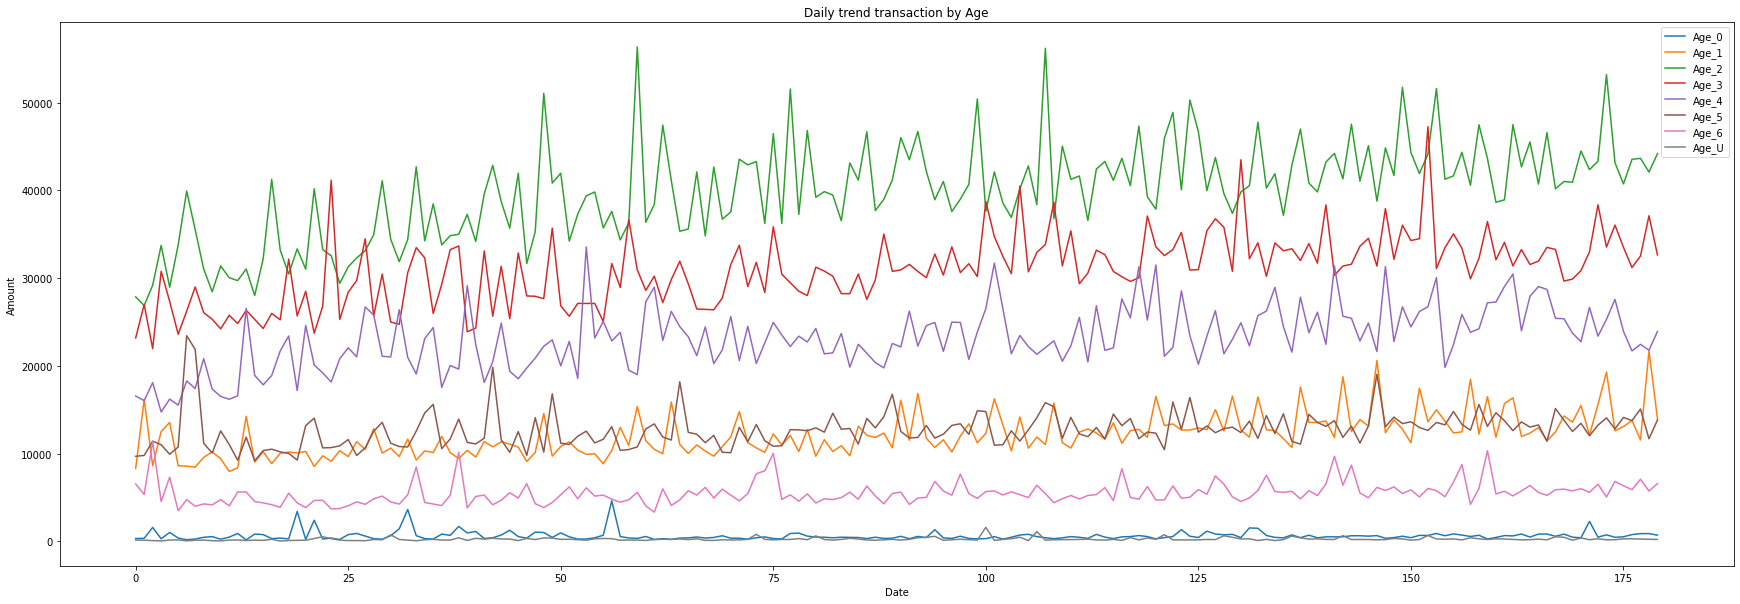

In [ ]:
#Show daily trend transaction by Age 

plt.figure(figsize=(30, 10))
line_chart1 = plt.plot(registration_data1)
#line_chart2 = plt.plot(Female,"m")
plt.title('Daily trend transaction by Age')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend(['Age_0',"Age_1","Age_2","Age_3","Age_4","Age_5","Age_6","Age_U"])
plt.show()


The group who use more theirs credit card have in mean : 2 years of fidelity.

##Daily Trend Transaction By Category

In [ ]:
#createsimple dataframe with each needed columns
#create a data can give the daily trend transaction by category by concatenation
date=Bank['date']
amount=Bank['amount']
category=Bank['category']
customer=Bank['customer']
Daily_trend_Transaction_By_Category= pd.concat([date,category,amount,customer], axis=1)

Daily_trend_Transaction_By_Category

,date,category,amount,customer
0,0,es_transportation,4.55,C1093826151
1,0,es_transportation,39.68,C352968107
2,0,es_transportation,26.89,C2054744914
3,0,es_transportation,17.25,C1760612790
4,0,es_transportation,35.72,C757503768
...,...,...,...,...
594638,179,es_transportation,20.53,C1753498738
594639,179,es_transportation,50.73,C650108285
594640,179,es_fashion,22.44,C123623130
594641,179,es_transportation,14.46,C1499363341


In [ ]:
#Tranform values category in columns
Daily_trend_Transaction_By_Category1= pd.get_dummies(Daily_trend_Transaction_By_Category[["date","category","amount","customer"]], columns=['category'], prefix="", prefix_sep="")
Daily_trend_Transaction_By_Category1
#Daily_trend_Transaction_By_Age1.drop(["U"], axis='columns' , inplace=True)
#Daily_trend_Transaction_By_Genre1

,date,amount,customer,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel,es_wellnessandbeauty
0,0,4.55,C1093826151,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,39.68,C352968107,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,26.89,C2054744914,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,17.25,C1760612790,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,35.72,C757503768,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594638,179,20.53,C1753498738,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
594639,179,50.73,C650108285,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
594640,179,22.44,C123623130,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
594641,179,14.46,C1499363341,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:

#df["x"]=Daily_trend_transaction_By_Category1.columns

#Add a columns 'es_barsandrestaurants' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["barsandrestaurants"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_barsandrestaurants"]==1 ,"barsandrestaurants"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_barsandrestaurants"]==1].amount
Daily_trend_Transaction_By_Category1["barsandrestaurants"]



#Add a columns 'es_contents' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["contents"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_contents"]==1 ,"contents"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_contents"]==1].amount
Daily_trend_Transaction_By_Category1["contents"]



#Add a columns 'es_fashion' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["fashion"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_fashion"]==1 ,"fashion"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_fashion"]==1].amount
Daily_trend_Transaction_By_Category1["fashion"]


#Add a columns 'es_food' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["food"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_food"]==1 ,"food"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_food"]==1].amount
Daily_trend_Transaction_By_Category1["food"]


#Add a columns 'es_health' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["health"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_health"]==1 ,"health"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_health"]==1].amount
Daily_trend_Transaction_By_Category1["health"]


#Add a columns 	'es_home' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["home"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_home"]==1 ,"home"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_home"]==1].amount
Daily_trend_Transaction_By_Category1["home"]


#Add a columns 'es_hotelservices' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["hotelservices"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_hotelservices"]==1 ,"hotelsevices"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_hotelservices"]==1].amount
Daily_trend_Transaction_By_Category1["hotelservices"]


#Add a columns 'es_hyper' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["hyper"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_hyper"]==1 ,"hyper"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_hyper"]==1].amount
Daily_trend_Transaction_By_Category1["hyper"]


#Add a columns 'es_leisure' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["leisure"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_leisure"]==1 ,"leisure"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_leisure"]==1].amount
Daily_trend_Transaction_By_Category1["leisure"]


#Add a columns 'es_otherservices' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["otherservices"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_otherservices"]==1 ,"othersevices"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_otherservices"]==1].amount
Daily_trend_Transaction_By_Category1["otherservices"]


#Add a columns 'es_sportsandtoys' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["sportandtoys"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_sportsandtoys"]==1 ,"sportandtoys"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_sportsandtoys"]==1].amount
Daily_trend_Transaction_By_Category1["sportandtoys"]



#Add a columns 'es_tech' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["tech"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_tech"]==1 ,"tech"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_tech"]==1].amount
Daily_trend_Transaction_By_Category1["tech"]


#Add a columns 'es_transportation' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["transportation"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_transportation"]==1 ,"transportation"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_transportation"]==1].amount
Daily_trend_Transaction_By_Category1["transportation"]


#Add a columns 'es_travel' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["travel"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_travel"]==1 ,"travel"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_travel"]==1].amount
Daily_trend_Transaction_By_Category1["travel"]


#Add a columns 'es_wellnessandbeauty' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["wellnessandbeauty"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_wellnessandbeauty"]==1 ,"wellnessandbeauty"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_wellnessandbeauty"]==1].amount
Daily_trend_Transaction_By_Category1["wellnessandbeauty"]



#Build a dataframe with values on those new columns
barandrestaurants=Daily_trend_Transaction_By_Category1["barsandrestaurants"]
fashion=Daily_trend_Transaction_By_Category1["fashion"]
contents=Daily_trend_Transaction_By_Category1["contents"]
food=Daily_trend_Transaction_By_Category1["food"]
health=Daily_trend_Transaction_By_Category1["health"]
home=Daily_trend_Transaction_By_Category1["home"]
hotelservices=Daily_trend_Transaction_By_Category1["hotelservices"]
hyper=Daily_trend_Transaction_By_Category1["hyper"]
leisure=Daily_trend_Transaction_By_Category1["leisure"]
otherservices=Daily_trend_Transaction_By_Category1["otherservices"]
sportandtoys=Daily_trend_Transaction_By_Category1["sportandtoys"]
tech=Daily_trend_Transaction_By_Category1["tech"]
transportation=Daily_trend_Transaction_By_Category1["transportation"]
travel=Daily_trend_Transaction_By_Category1["travel"]
wellnessandbeauty=Daily_trend_Transaction_By_Category1["wellnessandbeauty"]
Date=Daily_trend_Transaction_By_Category1["date"]

#Concat each new created columns in a new dataframe
Daily_trend_Transaction_By_Category2=pd.concat([Date,barandrestaurants,fashion,contents,food,health,home,hotelservices,hyper,leisure,otherservices,sportandtoys,tech,transportation,travel,wellnessandbeauty], axis=1)
print(Daily_trend_Transaction_By_Category2)


#Groub by date
registration_data2 =Daily_trend_Transaction_By_Category2.groupby(["date"]).sum()
print(registration_data2)

        date  barsandrestaurants  ...  travel  wellnessandbeauty
0          0                 0.0  ...     0.0                0.0
1          0                 0.0  ...     0.0                0.0
2          0                 0.0  ...     0.0                0.0
3          0                 0.0  ...     0.0                0.0
4          0                 0.0  ...     0.0                0.0
...      ...                 ...  ...     ...                ...
594638   179                 0.0  ...     0.0                0.0
594639   179                 0.0  ...     0.0                0.0
594640   179                 0.0  ...     0.0                0.0
594641   179                 0.0  ...     0.0                0.0
594642   179                 0.0  ...     0.0                0.0

[594643 rows x 16 columns]
      barsandrestaurants  fashion  ...    travel  wellnessandbeauty
date                               ...                             
0                1603.71  1620.88  ...   1993.68        

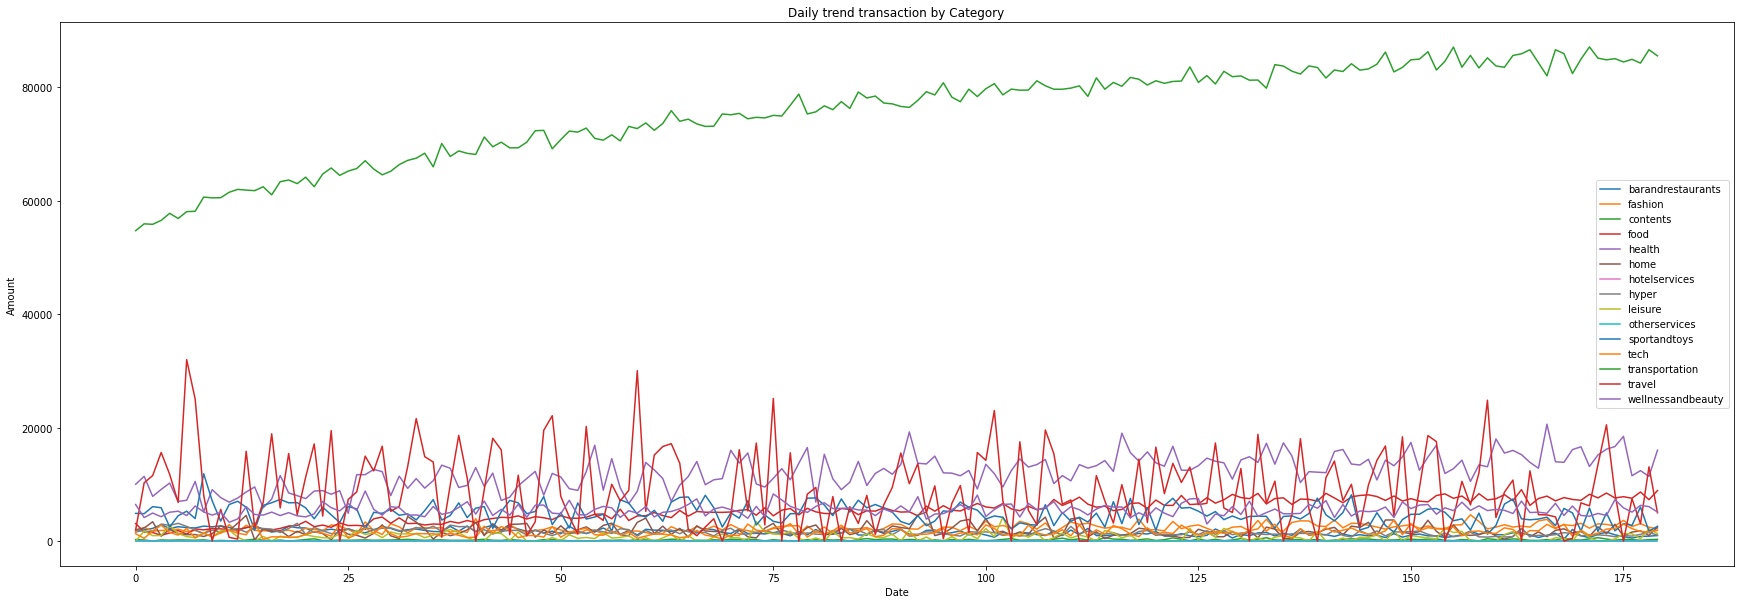

In [ ]:
#Show daily trend transaction by Category 

plt.figure(figsize=(30, 10))
line_chart1 = plt.plot(registration_data2)
#line_chart2 = plt.plot(Female,"m")
plt.title('Daily trend transaction by Category')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend(['barandrestaurants','fashion','contents','food','health','home','hotelservices','hyper','leisure','otherservices','sportandtoys','tech','transportation','travel','wellnessandbeauty'])
plt.show()

This previous graph show us the daily transaction by category. The category where the bank clients spend a lot is : "Transportation". They spent daily more than the mean of the the data set.

#Hypothesis Test

**The contingency tables between Fraud and other Categorical variables**

**+**

**Chi-Square test 
(A Chi-Square test is determined by a significant difference or relationship
between two categorical variables from a single population. In general, this test
assesses whether distributions of categorical variables differ from each other).**

**The contingency table between Fraud and Gender**

**+ Chi-Square test**

In [ ]:
Bank

,date,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0
1,0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0
2,0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0
3,0,C1760612790,3,M,28007,M348934600,28007,es_transportation,17.25,0
4,0,C757503768,5,M,28007,M348934600,28007,es_transportation,35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,C1753498738,3,F,28007,M1823072687,28007,es_transportation,20.53,0
594639,179,C650108285,4,F,28007,M1823072687,28007,es_transportation,50.73,0
594640,179,C123623130,2,F,28007,M349281107,28007,es_fashion,22.44,0
594641,179,C1499363341,5,M,28007,M1823072687,28007,es_transportation,14.46,0


In [ ]:
Bank["index"]=Bank.index

In [ ]:
# Summarise dataframe using pivot table: Fraud & Gender
fraud_gender_bank_pivot=pd.pivot_table(Bank,values="index", index=['fraud',],
 columns=['gender'], aggfunc="count",fill_value =0)


In [ ]:
#Show Pivot table
fraud_gender_bank_pivot

gender,E,F,M,U
fraud,,,,
0,1171,319807,265950,515
1,7,4758,2435,0


In [ ]:
#Show pivot tables values
fraud_gender_bank_pivot.values

array([[  1171, 319807, 265950,    515],
       [     7,   4758,   2435,      0]])

In [ ]:
chi2_contingency(fraud_gender_bank_pivot.values)

(393.4250821335444,
 5.878948827350995e-85,
 3,
 array([[1.16373665e+03, 3.20635133e+05, 2.65135366e+05, 5.08764326e+02],
        [1.42633479e+01, 3.92986716e+03, 3.24963381e+03, 6.23567418e+00]]))

Null Hypothesis H0: The two categorical variables are independent—that is,
fraud is independent with gender.

Alternative Hypothesis Ha
: The two categorical variables are not
independent—that is, fraud is not independent with gender.

In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(fraud_gender_bank_pivot.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 5.878948827350995e-85
Hypothesis Rejected


**The contingency table between Fraud and Category**

**+ Chi-Square test**

In [ ]:
# Summarise dataframe using pivot table: Fraud & Category
fraud_category_bank_pivot=pd.pivot_table(Bank,values="index", index=['fraud',],
 columns=['category'], aggfunc="count",fill_value =0)


In [ ]:
#Show pivot tables
fraud_category_bank_pivot

category,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel,es_wellnessandbeauty
fraud,,,,,,,,,,,,,,,
0,6253,885,6338,26254,14437,1684,1196,5818,25,684,2020,2212,505119,150,14368
1,120,0,116,0,1696,302,548,280,474,228,1982,158,0,578,718


In [ ]:
#show pivot table values
fraud_category_bank_pivot.values

array([[  6253,    885,   6338,  26254,  14437,   1684,   1196,   5818,
            25,    684,   2020,   2212, 505119,    150,  14368],
       [   120,      0,    116,      0,   1696,    302,    548,    280,
           474,    228,   1982,    158,      0,    578,    718]])

Null Hypothesis H0: The two categorical variables are independent—that is,
fraud is independent of the bank category.

Alternative Hypothesis Ha
: The two categorical variables are not
independent—that is, fraud is not independent of the Bank category.

In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(fraud_category_bank_pivot.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 0.0
Hypothesis Rejected


**The contingency table between Fraud and Age**

**+ Chi-Square test**

In [ ]:
# Summarise dataframe using pivot table: Fraud & Age
fraud_age_bank_pivot=pd.pivot_table(Bank,values="index", index=['fraud',],
 columns=['age'], aggfunc="count",fill_value =0)

In [ ]:
#show pivot table
fraud_age_bank_pivot

age,0,1,2,3,4,5,6,U
fraud,,,,,,,,
0,2404,57442,184966,145376,107615,61956,26513,1171
1,48,689,2344,1755,1410,686,261,7


In [ ]:
#Show pivot table values
fraud_age_bank_pivot.values

array([[  2404,  57442, 184966, 145376, 107615,  61956,  26513,   1171],
       [    48,    689,   2344,   1755,   1410,    686,    261,      7]])

Null Hypothesis H0: The two categorical variables are independent—that is,
fraud is independent of the age level.

Alternative Hypothesis Ha
: The two categorical variables are not
independent—that is, fraud is not independent of the
age level

In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(fraud_age_bank_pivot.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 2.0021179263106975e-07
Hypothesis Rejected


**The contingency table between Fraud and The level of the amount**

**+ Chi-Square test**

In [ ]:
# Summarise dataframe using pivot table: Fraud & Age
fraud_amount_bank_pivot=pd.pivot_table(Bank,values="index", index=['fraud',],
 columns=['amount'], aggfunc="count",fill_value =0)

In [ ]:
#Show pivot table
fraud_amount_bank_pivot

amount,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,5516.40,5527.37,5538.92,5577.33,5592.11,5646.51,5647.26,5714.70,5734.06,5734.27,5736.56,5739.93,5749.28,5771.18,5772.54,5821.37,5856.70,6110.23,6129.63,6142.59,6161.03,6163.01,6197.13,6260.89,6369.83,6405.95,6532.45,6565.95,6590.61,6620.36,6649.49,6679.23,6888.30,7134.39,7272.41,7403.44,7432.48,7635.41,7665.56,8329.96
fraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,52,96,106,106,101,90,113,110,102,109,133,108,89,103,107,93,106,111,102,95,104,86,94,132,94,105,102,88,117,100,108,94,90,124,90,92,112,111,93,104,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
#Create class of amount
Bank['ZZ']=pd.cut(Bank.amount.values,90,ordered=True)

In [ ]:
#Show bank Class amount Values
Bank["ZZ"]

0         (-8.33, 92.555]
1         (-8.33, 92.555]
2         (-8.33, 92.555]
3         (-8.33, 92.555]
4         (-8.33, 92.555]
               ...       
594638    (-8.33, 92.555]
594639    (-8.33, 92.555]
594640    (-8.33, 92.555]
594641    (-8.33, 92.555]
594642    (-8.33, 92.555]
Name: ZZ, Length: 594643, dtype: category
Categories (90, interval[float64]): [(-8.33, 92.555] < (92.555, 185.11] < (185.11, 277.665] <
                                     (277.665, 370.22] ... (7959.74, 8052.295] <
                                     (8052.295, 8144.85] < (8144.85, 8237.405] < (8237.405, 8329.96]]

In [ ]:
#Show modifed dataset
Bank

,date,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,index,ZZ
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0,0,"(-8.33, 92.555]"
1,0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0,1,"(-8.33, 92.555]"
2,0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0,2,"(-8.33, 92.555]"
3,0,C1760612790,3,M,28007,M348934600,28007,es_transportation,17.25,0,3,"(-8.33, 92.555]"
4,0,C757503768,5,M,28007,M348934600,28007,es_transportation,35.72,0,4,"(-8.33, 92.555]"
...,...,...,...,...,...,...,...,...,...,...,...,...
594638,179,C1753498738,3,F,28007,M1823072687,28007,es_transportation,20.53,0,594638,"(-8.33, 92.555]"
594639,179,C650108285,4,F,28007,M1823072687,28007,es_transportation,50.73,0,594639,"(-8.33, 92.555]"
594640,179,C123623130,2,F,28007,M349281107,28007,es_fashion,22.44,0,594640,"(-8.33, 92.555]"
594641,179,C1499363341,5,M,28007,M1823072687,28007,es_transportation,14.46,0,594641,"(-8.33, 92.555]"


In [ ]:
# Summarise dataframe using pivot table: Fraud & Class of amount
fraud_amount_bank_pivot1=pd.pivot_table(Bank,values="index", index=['fraud',],
 columns=['ZZ'], aggfunc="count",fill_value =0)

In [ ]:
#Show new dataset
fraud_amount_bank_pivot1

ZZ,"(-8.33, 92.555]","(92.555, 185.11]","(185.11, 277.665]","(277.665, 370.22]","(370.22, 462.776]","(462.776, 555.331]","(555.331, 647.886]","(647.886, 740.441]","(740.441, 832.996]","(832.996, 925.551]","(925.551, 1018.106]","(1018.106, 1110.661]","(1110.661, 1203.216]","(1203.216, 1295.772]","(1295.772, 1388.327]","(1388.327, 1480.882]","(1480.882, 1573.437]","(1573.437, 1665.992]","(1665.992, 1758.547]","(1758.547, 1851.102]","(1851.102, 1943.657]","(1943.657, 2036.212]","(2036.212, 2128.768]","(2128.768, 2221.323]","(2221.323, 2313.878]","(2313.878, 2406.433]","(2406.433, 2498.988]","(2498.988, 2591.543]","(2591.543, 2684.098]","(2684.098, 2776.653]","(2776.653, 2869.208]","(2869.208, 2961.764]","(2961.764, 3054.319]","(3054.319, 3146.874]","(3146.874, 3239.429]","(3239.429, 3331.984]","(3331.984, 3424.539]","(3424.539, 3517.094]","(3517.094, 3609.649]","(3609.649, 3702.204]","(3702.204, 3794.76]","(3794.76, 3887.315]","(3887.315, 3979.87]","(3979.87, 4072.425]","(4072.425, 4164.98]","(4164.98, 4257.535]","(4257.535, 4350.09]","(4350.09, 4442.645]","(4442.645, 4535.2]","(4535.2, 4627.756]","(4627.756, 4720.311]","(4720.311, 4812.866]","(4812.866, 4905.421]","(4905.421, 4997.976]","(4997.976, 5090.531]","(5090.531, 5183.086]","(5183.086, 5275.641]","(5275.641, 5368.196]","(5368.196, 5460.752]","(5460.752, 5553.307]","(5553.307, 5645.862]","(5645.862, 5738.417]","(5738.417, 5830.972]","(5830.972, 5923.527]","(6108.637, 6201.192]","(6201.192, 6293.748]","(6293.748, 6386.303]","(6386.303, 6478.858]","(6478.858, 6571.413]","(6571.413, 6663.968]","(6663.968, 6756.523]","(6849.078, 6941.633]","(7126.744, 7219.299]","(7219.299, 7311.854]","(7311.854, 7404.409]","(7404.409, 7496.964]","(7589.519, 7682.074]","(8237.405, 8329.96]"
fraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,570585,13361,2815,502,85,15,8,13,11,11,7,2,2,9,3,2,5,1,0,2,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1059,1007,1053,1046,736,529,426,288,223,155,93,72,42,14,19,23,13,10,7,17,15,16,11,9,10,14,13,7,11,10,12,14,8,13,6,6,11,3,9,12,6,7,7,11,6,13,6,5,3,5,8,12,4,6,1,4,4,5,2,5,2,6,5,1,7,1,1,1,2,3,1,1,1,1,1,1,2,1


Null Hypothesis H0: The two variables are independent—that is,
fraud is independent of the highest amount level.

Alternative Hypothesis Ha
: The two variables are not
independent—that is, fraud is not independent of the
highest amount level

In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(fraud_amount_bank_pivot1.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 0.0
Hypothesis Rejected


### What are your thoughts on the fraudulent transactions?

We asked ourselves about potential correlations between fraud and different categories of transactions, ages or gender.
We could see that the probability of fraud is dependent on the different categories. 





 ### Is there a threshold of the spent for fraudulent transaction?

From our pivot table between the fraud and class of amount values, we can see that the amount of fraudulent transactions per class exceeds the amount of non-fraudulent transactions from the [277-370] dollar values.

## Is there a specific ‘gender’ with a higher probability to be the victim of a fraudulent act?


In [92]:
#Show dataset
fraud_gender_bank_pivot

gender,E,F,M,U
fraud,,,,
0,1171,319807,265950,515
1,7,4758,2435,0


In [93]:
#Show percentage fraud repartition By Gender
fraud_gender_bank_pivot1=(fraud_gender_bank_pivot/Bank.shape[0])*100

In [94]:
fraud_gender_bank_pivot1

gender,E,F,M,U
fraud,,,,
0,0.196925,53.781344,44.724314,0.086607
1,0.001177,0.800144,0.409489,0.000000


According to the previous contingency table, for every 1000 transactions made by women, about 8 are fraudulent compared to only 4 for men.

It is safe to say that women are more likely to be victims of fraud.

## Is there a specifix ‘category’ of transactions with higher chance to be fraudulent?



In [ ]:
#Build Dataset who sho percentage fraud repartition By Category
fraud_category_bank_pivot1=(fraud_category_bank_pivot/Bank.shape[0])*100

In [85]:
#Show dataset
print("These number are given as a percentage")
fraud_category_bank_pivot1

These number are given as a percentage


category,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel,es_wellnessandbeauty
fraud,,,,,,,,,,,,,,,
0,1.051555,0.148829,1.065850,4.415086,2.427843,0.283195,0.201129,0.978402,0.004204,0.115027,0.339700,0.371988,84.944917,0.025225,2.416240
1,0.020180,0.000000,0.019508,0.000000,0.285213,0.050787,0.092156,0.047087,0.079712,0.038342,0.333309,0.026571,0.000000,0.097201,0.120745


As we can see , Sport and toys is the category who have globally the higher probability to be victim by a fraud.

#Recommandations

### What are your recommendations to the bank's management and describe how your solution will help regain trust from customers?

Analysis of our data allowed us to see that most transactions are worth less than $ 1000.

Much of our fraud is also found in transactions under $ 1000.

we also notice that the higher the values ​​of the transactions, the more they have a high probability of being a fraud.

We can also notice that women are twice as victims of theft than men.
This can be explained by the fact that they buy more often and for higher amounts than men.

Paradoxically, we note that spending on sports and games is more often the victim of fraud than any other category except that it is not the category where people spend the most in terms of volume.

I'll ask the bank to let us build a machine learning model.
Able to predict, detect and report fraud in real time.

This model would be particularly parameterized to delay the validations of any transactions made by women and of a value exceeding 500 dollars in the categories sport and leisure.

The system will have to ask these customers in these categories to reconfirm their transactions before validation.



I will recommend that the bank conduct a study to determine to what level it can improve the security of its electronic payment system. Make it less vulnerable to hacks.

These solutions could drastically reduce theft complaints. And improve the feeling of security of customers.
And at the same time, boost customer confidence and improve the bank's image.

### Any other data that you would ask the team to provide? Why?

We can notice that the zip codes are identical for all customers and all merchants.
Yet we have to assume that the bank does not only do business there.
Additional data on other geographic areas of transactions would be welcome and would help us refine our predictive machine learning model.